**Source**: https://github.com/open-toolbox/SWMM-Astlingen

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import swmm_api
print(f'{swmm_api.__version__ = }')

swmm_api.__version__ = '0.4.60'


In [3]:
from swmm_api import SwmmInput, SwmmOutput, SwmmReport

In [4]:
inp = SwmmInput('Astlingen/Astlingen_SWMM.inp', encoding='utf-8')

In [5]:
from swmm_api.input_file.macros import print_summary

print_summary(inp)

ROUTING_STEP: 0:00:30
NODES: 30
   JUNCTIONS: 23
   STORAGE: 6
   OUTFALLS: 1
LINKS: 29
   CONDUITS: 23
   WEIRS: 0
   OUTLETS: 0
   ORIFICES: 6
SUBCATCHMENTS: 10


In [7]:
inp.BACKDROP

{'FILE': 'astingen.jpg', 'DIMENSIONS': [-3888.889, 0.0, 13888.889, 10000.0]}

In [8]:
inp.BACKDROP['FILE'] = 'Astlingen/' + inp.BACKDROP['FILE']

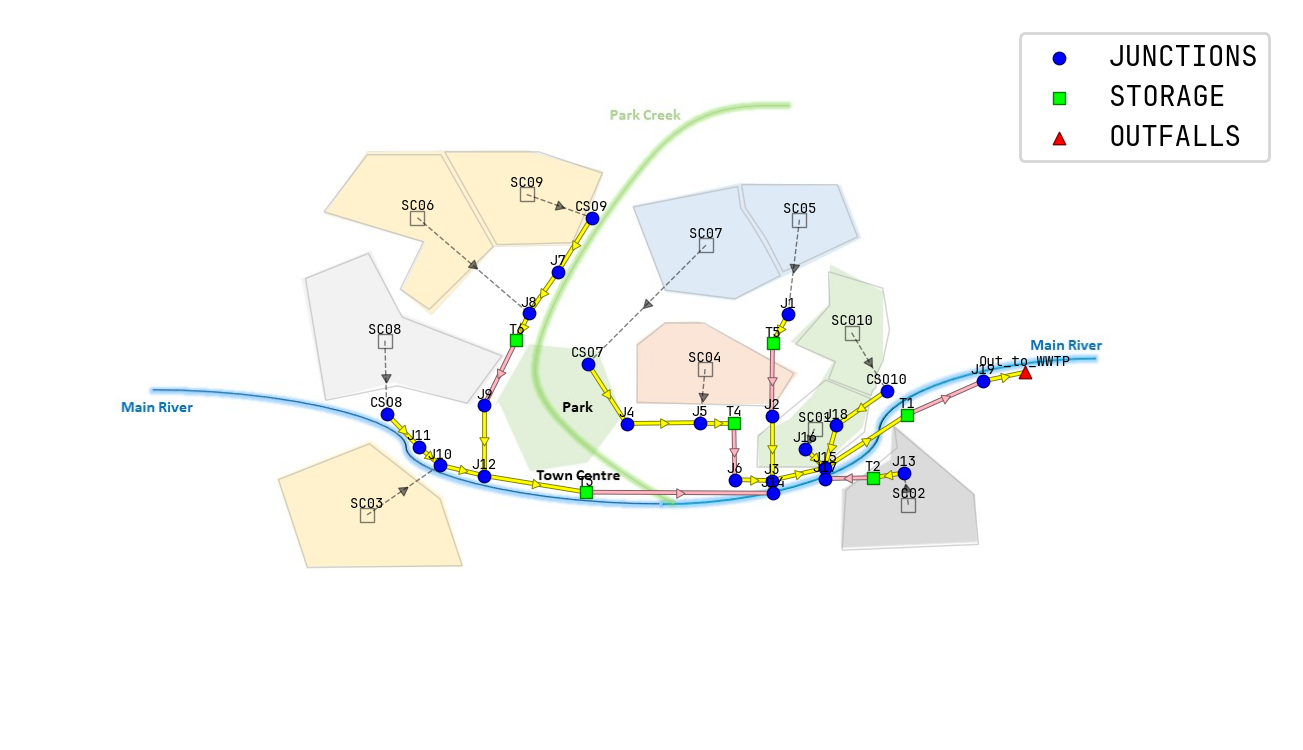

In [16]:
from swmm_api.input_file.macros import init_empty_map_plot, add_node_map, add_link_map, add_subcatchment_map, add_node_labels, add_backdrop, add_link_labels, add_subcatchments_labels, add_labels

fig, ax = init_empty_map_plot()

add_link_map(ax, inp, add_arrows=True)
add_subcatchment_map(ax, inp, add_center_point=True, add_connector_arrows=True, fill=False)
add_node_map(ax, inp)
add_node_labels(ax, inp, size=5, y_offset=100)
add_backdrop(ax, inp)
add_subcatchments_labels(ax, inp, size=5, y_offset=110)

In [19]:
from swmm_api.input_file.macros import init_empty_map_plot, add_node_map, add_link_map, add_subcatchment_map, add_node_labels, add_backdrop, add_link_labels, add_subcatchments_labels, add_labels

fig, ax = init_empty_map_plot()

add_link_map(ax, inp, add_arrows=True)
add_subcatchment_map(ax, inp, add_center_point=True, add_connector_arrows=True, values_dict=inp.SUBCATCHMENTS.frame['rain_gage'].to_dict(), cmap='rainbow', colorbar_kwargs={'title': 'Raingage', 'loc': 'upper left'}, discrete=True)
add_node_map(ax, inp)

In [23]:
from swmm_api.input_file.macros import init_empty_map_plot, add_node_map, add_link_map, add_subcatchment_map, add_node_labels, add_backdrop, add_link_labels, add_subcatchments_labels, add_labels

fig, ax = init_empty_map_plot()

add_link_map(ax, inp, add_arrows=True)
add_subcatchment_map(ax, inp, add_center_point=True, add_connector_arrows=True, values_dict=inp.SUBCATCHMENTS.frame['slope'].to_dict(), cmap='rainbow', colorbar_kwargs={'title': 'Slope', 'loc': 'upper left'}, discrete=True)
add_node_map(ax, inp)

In [24]:
from swmm_api.input_file.macros import init_empty_map_plot, add_node_map, add_link_map, add_subcatchment_map, add_node_labels, add_backdrop, add_link_labels, add_subcatchments_labels, add_labels

fig, ax = init_empty_map_plot()

add_link_map(ax, inp, add_arrows=True)
add_subcatchment_map(ax, inp, add_center_point=True, add_connector_arrows=True, values_dict=inp.SUBAREAS.frame['n_imperv'].to_dict(), cmap='rainbow', colorbar_kwargs={'title': 'Roughness\nImpervious\nArea', 'loc': 'upper left'}, discrete=True)
add_node_map(ax, inp)

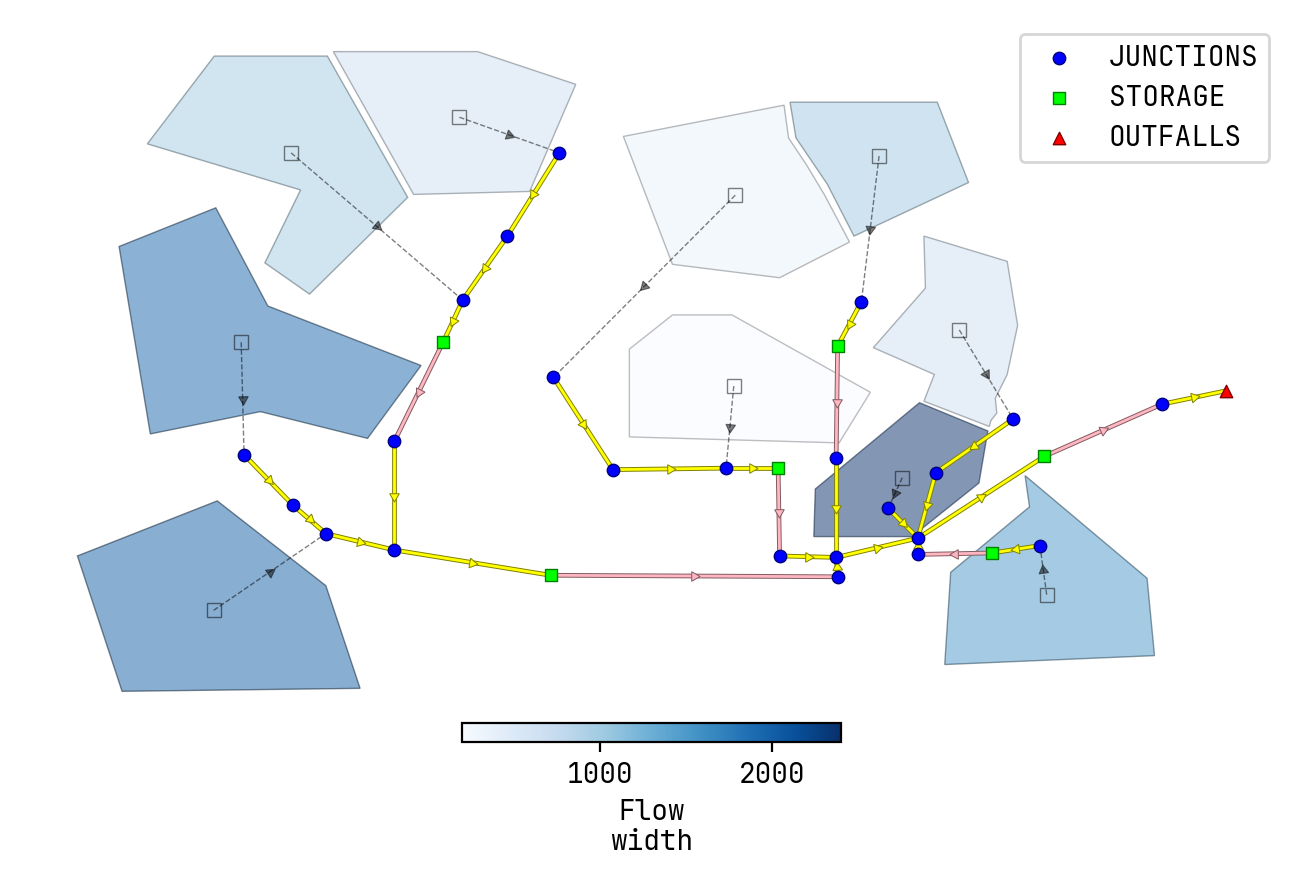

In [28]:
from swmm_api.input_file.macros import init_empty_map_plot, add_node_map, add_link_map, add_subcatchment_map, add_node_labels, add_backdrop, add_link_labels, add_subcatchments_labels, add_labels

fig, ax = init_empty_map_plot()

add_link_map(ax, inp, add_arrows=True)
add_subcatchment_map(ax, inp, add_center_point=True, add_connector_arrows=True, values_dict=inp.SUBCATCHMENTS.frame['width'].to_dict(), cmap='Blues', colorbar_kwargs={'title': 'Flow\nwidth'})
add_node_map(ax, inp)

In [14]:
from swmm_api.input_file.macros import combined_subcatchment_frame
combined_subcatchment_frame(inp)

rain_gage outlet   area  imperviousness   width  slope  curb_length  \
name                                                                        
SC01        RG4    J16  33.00           100.0  2400.0   0.80          0.0   
SC02        RG3    J13  22.75           100.0  1500.0   0.80          0.0   
SC03        RG1    J10  18.00           100.0  2000.0   0.50          0.0   
SC04        RG3     J5   6.90           100.0   200.0   0.70          0.0   
SC05        RG4     J1  15.60           100.0  1000.0   0.50          0.0   
SC06        RG2     J8  32.55           100.0   985.0   0.50          0.0   
SC07        RG3   CSO7   4.75           100.0   360.0   0.51          0.0   
SC08        RG1   CSO8  28.00           100.0  1950.0   0.45          0.0   
SC09        RG2   CSO9   6.90           100.0   650.0   0.40          0.0   
SC010       RG4  CSO10  11.75           100.0   650.0   0.50          0.0   

       snow_pack  n_imperv  n_perv  ...  pct_zero  route_to  pct_routed  \
name                                ...                                   
SC01         NaN     0.009     0.1  ...       0.0    OUTLET       100.0   
SC02         NaN     0.009     0.1  ...       0.0    OUTLET       100.0   
SC03         NaN     0.007     0.1  ...       0.0    OUTLET       100.0   
SC04         NaN     0.009     0.1  ...       0.0    OUTLET       100.0   
SC05         NaN     0.007     0.1  ...       0.0    OUTLET       100.0   
SC06         NaN     0.010     0.1  ...       0.0    OUTLET       100.0   
SC07         NaN     0.020     0.1  ...       0.0    OUTLET       100.0   
SC08         NaN     0.010     0.1  ...       0.0    OUTLET       100.0   
SC09         NaN     0.016     0.1  ...       0.0    OUTLET       100.0   
SC010        NaN     0.008     0.1  ...       0.0    OUTLET       100.0   

      rate_max  rate_min  decay  time_dry  volume_max  kind  tag  
name                                                              
SC01       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC02       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC03       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC04       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC05       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC06       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC07       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC08       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC09       3.0       0.5    4.0       7.0         0.0   NaN  NaN  
SC010      3.0       0.5    4.0       7.0         0.0   NaN  NaN  

[10 rows x 22 columns]

In [29]:
from swmm_api.input_file.sections import Control

controls = Control.from_inp_lines(open('Astlingen/EFD_Control.txt', 'r').read())
controls

{   'EFDO1': Control(name='EFDO1', conditions=[_Condition(logic='IF', object_kind='NODE', label='T2', attribute='DEPTH', relation='<', value='1'), _Condition(logic='AND', object_kind='NODE', label='T3', attribute='DEPTH', relation='<', value='1'), _Condition(logic='AND', object_kind='NODE', label='T4', attribute='DEPTH', relation='<', value='1'), _Condition(logic='AND', object_kind='NODE', label='T6', attribute='DEPTH', relation='<', value='1')], actions_if=[_Action(kind='ORIFICE', label='V2', action='SETTING', relation='=', value='0.2366'), _Action(kind='ORIFICE', label='V3', action='SETTING', relation='=', value='0.6508'), _Action(kind='ORIFICE', label='V4', action='SETTING', relation='=', value='0.3523'), _Action(kind='ORIFICE', label='V6', action='SETTING', relation='=', value='0.4303')], actions_else=[], priority=0),
    'EFDO2T2': Control(name='EFDO2T2', conditions=[_Condition(logic='IF', object_kind='NODE', label='T2', attribute='DEPTH', relation='>', value='NODE T3 DEPTH'), _Co